In [1]:
from collections import OrderedDict

import numpy as np
import matplotlib.pyplot as plt

import bayes_opt.visualization.visualization_utility_cost as viz
from bayes_opt.test_functions import drl_experiments
from bayes_opt.utility.basic_utility_functions import evaluating_final_util_MaxEpoch,set_seed
from bayes_opt.curve_compression import return_logistic_curve

from bayes_opt.sequentialBO.boil import BOIL

from tqdm import tqdm
import warnings


warnings.filterwarnings("ignore")

#set_seed(1337)


W1121 12:40:22.637740 17840 deprecation.py:323] From C:\Users\Vu\Anaconda3\envs\tfgpu\lib\site-packages\tensorflow\python\compat\v2_compat.py:96: disable_resource_variables (from tensorflow.python.ops.variable_scope) is deprecated and will be removed in a future version.
Instructions for updating:
non-resource variables are not supported in the long term


# Specifying the search space

In [2]:
SearchSpace = OrderedDict([('gamma',(0.8,1)),("lr_actor", (1e-6,1e-2)),("lr_critic", (1e-6,1e-2)),
                      ('maxEpisodes',(700, 1500))]) # 700 1500

varParams = list(SearchSpace.keys())

# These are the fixed hyperparamters for DRL

In [3]:
fixedParams = OrderedDict([
        ("lr_actor", 5e-4),
        ("lr_critic", 5e-4),
        ("ent_coef", 0.01),
        ("maxSteps", 200),
        ("val_architecture", [32,32]),
        ("pol_architecture", [32,32])])

# Initializing the Advantage Actor Critic (A2C) on InvertedPendulum-v2 environment (require Mujoco license)

In [4]:
myfunction=drl_experiments.DRL_experiment("A2C", "InvertedPendulum-v2", varParams, fixedParams, SearchSpace)


# Initializing BOIL class

In [5]:
acq_name='ei_mu_max'

func_params={}
func_params['function']=myfunction

boil=BOIL(myfunction.func,myfunction.bounds,acq_name=acq_name,verbose=1)

# Initializing BOIL with 10 points

In [6]:
n_init_points=10
print("initialization {} points - please wait...".format(n_init_points))
boil.init(n_init_points)

initialization 10 points - please wait...


W1121 12:40:24.489398 17840 deprecation.py:506] From C:\Users\Vu\Anaconda3\envs\tfgpu\lib\site-packages\tensorflow\python\ops\linalg\linear_operator_diag.py:166: calling LinearOperator.__init__ (from tensorflow.python.ops.linalg.linear_operator) with graph_parents is deprecated and will be removed in a future version.
Instructions for updating:
Do not pass `graph_parents`.  They will  no longer be used.


Max #augmented points 10 	 #augmented points  8 	 Augmented points:  [0.    0.106 0.245 0.365 0.5   0.654 0.783 0.905]
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []


# Running BOIL over multiple iterations

In [7]:
NN=10*myfunction.input_dim
print("Running BOIL for {} iterations".format(NN))
strFolderOut="run_experiments\plot"

for index in tqdm(range(0,NN)):
    boil.suggest_nextpoint()


Running BOIL for 40 iterations


  0%|                                                                                           | 0/40 [00:00<?, ?it/s]

ln of conditioning number of GP covariance matrix 9.2
selected point from acq func: [0.2155 0.8834 0.     0.9753] acq val=log(Utility/Cost)= -1.4024
Max #augmented points 9 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.8431 0.0088 0.    ] t=1480 current y=35.25, ybest=127.79


  2%|██                                                                              | 1/40 [14:10<9:12:34, 850.12s/it]

ln of conditioning number of GP covariance matrix 9.2
selected point from acq func: [0.2156 0.8161 0.0588 1.    ] acq val=log(Utility/Cost)= -1.0862
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.8431 0.0082 0.0006] t=1500 current y=57.13, ybest=127.79


  5%|████                                                                            | 2/40 [28:14<8:57:22, 848.48s/it]

ln of conditioning number of GP covariance matrix 9.2
selected point from acq func: [0.1826 0.9096 0.0518 1.    ] acq val=log(Utility/Cost)= 0.7254
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.8365 0.0091 0.0005] t=1500 current y=68.31, ybest=127.79


  8%|█████▊                                                                        | 3/40 [54:10<10:54:06, 1060.71s/it]

ln of conditioning number of GP covariance matrix 9.2
selected point from acq func: [0.4492 0.5481 0.1373 0.8854] acq val=log(Utility/Cost)= -1.5399
Max #augmented points 8 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.8898 0.0055 0.0014] t=1408 current y=97.00, ybest=127.79


 10%|███████▌                                                                    | 4/40 [1:24:07<12:48:56, 1281.56s/it]

ln of conditioning number of GP covariance matrix 9.2
selected point from acq func: [0.3757 0.537  0.1605 1.    ] acq val=log(Utility/Cost)= -1.5236
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.8751 0.0054 0.0016] t=1500 current y=79.60, ybest=127.79


 12%|█████████▌                                                                  | 5/40 [1:47:41<12:50:46, 1321.33s/it]

ln of conditioning number of GP covariance matrix 9.2
selected point from acq func: [0.4556 0.6305 0.1474 1.    ] acq val=log(Utility/Cost)= -3.4403
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.8911 0.0063 0.0015] t=1500 current y=2.35, ybest=127.79


 15%|███████████▋                                                                  | 6/40 [1:50:39<9:14:22, 978.31s/it]

ln of conditioning number of GP covariance matrix 9.2
==estimated lengthscale_x=0.0300   lengthscale_t=0.300   Logistic_m0=3.0   Logistic_g0=2.0
selected point from acq func: [0.437  0.5073 0.0541 1.    ] acq val=log(Utility/Cost)= -0.8152
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.8874 0.0051 0.0005] t=1500 current y=1.80, ybest=127.79


 18%|█████████████▋                                                                | 7/40 [1:56:32<7:14:51, 790.65s/it]

ln of conditioning number of GP covariance matrix 9.4
selected point from acq func: [0.4557 0.4991 0.6106 0.4336] acq val=log(Utility/Cost)= -4.6503
Max #augmented points 4 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.8911 0.005  0.0061] t=1047 current y=0.11, ybest=127.79


 20%|███████████████▌                                                              | 8/40 [1:59:25<5:22:54, 605.45s/it]

ln of conditioning number of GP covariance matrix 9.4
selected point from acq func: [0.1402 0.8433 0.0247 1.    ] acq val=log(Utility/Cost)= 0.1207
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.828  0.0084 0.0002] t=1500 current y=3.24, ybest=127.79


 22%|█████████████████▌                                                            | 9/40 [2:18:39<6:37:44, 769.82s/it]

ln of conditioning number of GP covariance matrix 9.4
selected point from acq func: [0.6668 0.913  0.0051 0.1565] acq val=log(Utility/Cost)= -12.9207
Max #augmented points 1 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.9334 0.0091 0.0001] t=825 current y=0.01, ybest=127.79


 25%|███████████████████▎                                                         | 10/40 [2:19:53<4:40:34, 561.15s/it]

ln of conditioning number of GP covariance matrix 9.4
selected point from acq func: [0.2707 0.8908 0.0812 1.    ] acq val=log(Utility/Cost)= -1.2117
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.8541 0.0089 0.0008] t=1500 current y=2.95, ybest=127.79


 28%|█████████████████████▏                                                       | 11/40 [2:32:13<4:57:13, 614.96s/it]

ln of conditioning number of GP covariance matrix 9.4
selected point from acq func: [0.4497 0.5289 0.1718 1.    ] acq val=log(Utility/Cost)= 0.7481
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.8899 0.0053 0.0017] t=1500 current y=24.52, ybest=127.79


 30%|███████████████████████                                                      | 12/40 [2:42:54<4:50:33, 622.62s/it]

ln of conditioning number of GP covariance matrix 9.4
selected point from acq func: [0.3948 0.5826 0.0913 0.8227] acq val=log(Utility/Cost)= -1.1709
Max #augmented points 8 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.879  0.0058 0.0009] t=1358 current y=4.56, ybest=127.79


 32%|█████████████████████████                                                    | 13/40 [3:11:35<7:08:32, 952.30s/it]

ln of conditioning number of GP covariance matrix 9.5
selected point from acq func: [0.5732 0.5138 0.1574 0.1863] acq val=log(Utility/Cost)= -1.6579
Max #augmented points 1 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.9146 0.0051 0.0016] t=849 current y=0.01, ybest=127.79


 35%|██████████████████████████▉                                                  | 14/40 [3:20:20<5:57:01, 823.89s/it]

ln of conditioning number of GP covariance matrix 9.5
==estimated lengthscale_x=0.0300   lengthscale_t=0.300   Logistic_m0=3.0   Logistic_g0=2.0
selected point from acq func: [0.4447 0.7411 0.     0.    ] acq val=log(Utility/Cost)= 1.4929
[original scale] x=[0.8889 0.0074 0.    ] t=700 current y=0.00, ybest=127.79


 38%|████████████████████████████▉                                                | 15/40 [3:23:54<4:27:01, 640.88s/it]

ln of conditioning number of GP covariance matrix 9.5
selected point from acq func: [0.3534 0.562  0.5141 1.    ] acq val=log(Utility/Cost)= -0.7618
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.8707 0.0056 0.0051] t=1500 current y=107.80, ybest=127.79


 40%|██████████████████████████████▍                                             | 16/40 [4:19:12<9:37:37, 1444.05s/it]

ln of conditioning number of GP covariance matrix 9.5
selected point from acq func: [0.5291 0.7604 0.     0.7216] acq val=log(Utility/Cost)= -0.9255
Max #augmented points 7 	 #augmented points  6 	 Augmented points:  [0.    0.124 0.285 0.379 0.526 0.602]
[original scale] x=[0.9058 0.0076 0.    ] t=1181 current y=0.61, ybest=127.79


 42%|████████████████████████████████▎                                           | 17/40 [4:33:11<8:04:02, 1262.73s/it]

ln of conditioning number of GP covariance matrix 9.8
selected point from acq func: [0.2724 0.5118 0.4971 1.    ] acq val=log(Utility/Cost)= -4.0835
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.8545 0.0051 0.005 ] t=1500 current y=2.66, ybest=127.79


 45%|██████████████████████████████████▋                                          | 18/40 [4:35:04<5:36:30, 917.74s/it]

ln of conditioning number of GP covariance matrix 9.8
selected point from acq func: [0.4148 0.6101 0.5313 1.    ] acq val=log(Utility/Cost)= -0.9427
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.883  0.0061 0.0053] t=1500 current y=109.32, ybest=127.79


 48%|████████████████████████████████████                                        | 19/40 [5:16:32<8:06:06, 1388.87s/it]

ln of conditioning number of GP covariance matrix 9.8
selected point from acq func: [0.2061 0.8662 0.0513 1.    ] acq val=log(Utility/Cost)= 0.0717
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.8412 0.0087 0.0005] t=1500 current y=103.40, ybest=127.79


 50%|██████████████████████████████████████                                      | 20/40 [5:55:55<9:20:20, 1681.04s/it]

ln of conditioning number of GP covariance matrix 9.8
selected point from acq func: [0.0989 0.8761 0.2592 1.    ] acq val=log(Utility/Cost)= -0.7145
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.8198 0.0088 0.0026] t=1500 current y=76.91, ybest=127.79


 52%|███████████████████████████████████████▉                                    | 21/40 [6:19:54<8:29:21, 1608.50s/it]

ln of conditioning number of GP covariance matrix 9.8
selected point from acq func: [0.4116 0.5422 0.5358 1.    ] acq val=log(Utility/Cost)= -1.7729
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.8823 0.0054 0.0054] t=1500 current y=100.28, ybest=127.79


 55%|█████████████████████████████████████████▊                                  | 22/40 [7:01:51<9:24:16, 1880.89s/it]

ln of conditioning number of GP covariance matrix 9.8
selected point from acq func: [0.3613 0.6253 0.5039 0.8695] acq val=log(Utility/Cost)= -2.0676
Max #augmented points 8 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.8723 0.0063 0.005 ] t=1396 current y=73.11, ybest=127.79


 57%|███████████████████████████████████████████▋                                | 23/40 [7:40:00<9:27:37, 2003.37s/it]

ln of conditioning number of GP covariance matrix 9.8
selected point from acq func: [1. 0. 1. 0.] acq val=log(Utility/Cost)= -2.8905
[original scale] x=[1.   0.   0.01] t=700 current y=0.00, ybest=127.79


 60%|█████████████████████████████████████████████▌                              | 24/40 [7:43:28<6:30:38, 1464.90s/it]

ln of conditioning number of GP covariance matrix 9.8
==estimated lengthscale_x=0.0300   lengthscale_t=0.300   Logistic_m0=3.0   Logistic_g0=2.0
selected point from acq func: [0.3322 0.637  0.     0.    ] acq val=log(Utility/Cost)= 0.2277
[original scale] x=[0.8664 0.0064 0.    ] t=700 current y=0.04, ybest=127.79


 62%|███████████████████████████████████████████████▌                            | 25/40 [8:01:00<5:35:16, 1341.07s/it]

ln of conditioning number of GP covariance matrix 9.9
selected point from acq func: [0.7176 0.6845 0.     0.    ] acq val=log(Utility/Cost)= -2.2643
[original scale] x=[0.9435 0.0068 0.    ] t=700 current y=0.00, ybest=127.79


 65%|█████████████████████████████████████████████████▍                          | 26/40 [8:08:55<4:12:17, 1081.26s/it]

ln of conditioning number of GP covariance matrix 9.9
selected point from acq func: [1.     0.     0.0177 0.7918] acq val=log(Utility/Cost)= -3.0979
Max #augmented points 7 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[1.     0.     0.0002] t=1333 current y=1.49, ybest=127.79


 68%|███████████████████████████████████████████████████▉                         | 27/40 [8:13:09<3:00:27, 832.87s/it]

ln of conditioning number of GP covariance matrix 9.9
selected point from acq func: [0.8121 0.0391 0.4744 0.    ] acq val=log(Utility/Cost)= -3.9587
[original scale] x=[0.9624 0.0004 0.0047] t=700 current y=0.00, ybest=127.79


 70%|█████████████████████████████████████████████████████▉                       | 28/40 [8:23:36<2:34:15, 771.26s/it]

ln of conditioning number of GP covariance matrix 9.9
selected point from acq func: [1.     0.8597 0.5415 0.    ] acq val=log(Utility/Cost)= -3.2401
[original scale] x=[1.     0.0086 0.0054] t=700 current y=0.00, ybest=127.79


 72%|███████████████████████████████████████████████████████▊                     | 29/40 [8:29:41<1:59:02, 649.34s/it]

ln of conditioning number of GP covariance matrix 9.9
selected point from acq func: [0.5656 0.     0.     0.    ] acq val=log(Utility/Cost)= -3.3067
[original scale] x=[0.9131 0.     0.    ] t=700 current y=0.00, ybest=127.79


 75%|█████████████████████████████████████████████████████████▊                   | 30/40 [8:36:04<1:34:52, 569.27s/it]

ln of conditioning number of GP covariance matrix 9.9
selected point from acq func: [1.     0.425  0.3237 0.    ] acq val=log(Utility/Cost)= -3.3812
[original scale] x=[1.     0.0043 0.0032] t=700 current y=0.00, ybest=127.79


 78%|███████████████████████████████████████████████████████████▋                 | 31/40 [8:38:26<1:06:12, 441.37s/it]

ln of conditioning number of GP covariance matrix 9.9
selected point from acq func: [0.9041 0.265  0.     0.    ] acq val=log(Utility/Cost)= -3.4959
[original scale] x=[0.9808 0.0027 0.    ] t=700 current y=0.04, ybest=127.79


 80%|█████████████████████████████████████████████████████████████▌               | 32/40 [8:53:44<1:17:54, 584.27s/it]

ln of conditioning number of GP covariance matrix 9.9
==estimated lengthscale_x=0.0300   lengthscale_t=0.300   Logistic_m0=3.0   Logistic_g0=2.0
selected point from acq func: [0.4675 0.632  0.     0.    ] acq val=log(Utility/Cost)= 0.1328
[original scale] x=[0.8935 0.0063 0.    ] t=700 current y=0.04, ybest=127.79


 82%|███████████████████████████████████████████████████████████████▌             | 33/40 [9:09:13<1:20:13, 687.65s/it]

ln of conditioning number of GP covariance matrix 9.9
selected point from acq func: [0.3689 0.5997 0.5599 1.    ] acq val=log(Utility/Cost)= -2.6681
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.8738 0.006  0.0056] t=1500 current y=80.72, ybest=127.79


 85%|█████████████████████████████████████████████████████████████████▍           | 34/40 [9:34:36<1:33:49, 938.31s/it]

ln of conditioning number of GP covariance matrix 9.9
selected point from acq func: [1.     1.     0.1852 0.    ] acq val=log(Utility/Cost)= -4.3764
[original scale] x=[1.     0.01   0.0019] t=700 current y=0.00, ybest=127.79


 88%|███████████████████████████████████████████████████████████████████▍         | 35/40 [9:43:22<1:07:53, 814.68s/it]

ln of conditioning number of GP covariance matrix 9.9
selected point from acq func: [1.     0.575  0.     0.2486] acq val=log(Utility/Cost)= -4.6493
Max #augmented points 2 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[1.     0.0058 0.    ] t=899 current y=0.02, ybest=127.79


 90%|███████████████████████████████████████████████████████████████████████        | 36/40 [9:47:27<42:55, 643.76s/it]

ln of conditioning number of GP covariance matrix 9.9
selected point from acq func: [1.     0.     0.2203 0.    ] acq val=log(Utility/Cost)= -4.3072
[original scale] x=[1.     0.     0.0022] t=700 current y=0.00, ybest=127.79


 92%|█████████████████████████████████████████████████████████████████████████      | 37/40 [9:58:44<32:40, 653.60s/it]

ln of conditioning number of GP covariance matrix 9.9
selected point from acq func: [1.     0.7088 0.2554 0.    ] acq val=log(Utility/Cost)= -5.241
[original scale] x=[1.     0.0071 0.0026] t=700 current y=0.00, ybest=127.79


 95%|██████████████████████████████████████████████████████████████████████████    | 38/40 [10:01:00<16:36, 498.42s/it]

ln of conditioning number of GP covariance matrix 9.9
selected point from acq func: [1.     0.3146 0.6599 0.    ] acq val=log(Utility/Cost)= -5.0712
[original scale] x=[1.     0.0031 0.0066] t=700 current y=0.00, ybest=127.79


 98%|████████████████████████████████████████████████████████████████████████████  | 39/40 [10:01:57<06:05, 365.78s/it]

ln of conditioning number of GP covariance matrix 9.9
selected point from acq func: [1.     1.     0.8646 0.    ] acq val=log(Utility/Cost)= -5.4989
[original scale] x=[1.     0.01   0.0086] t=700 current y=0.00, ybest=127.79


100%|██████████████████████████████████████████████████████████████████████████████| 40/40 [10:03:01<00:00, 275.46s/it]


# We evaluate the final performance score util MaxEpoch. The final utility score is marginalizing with different choices for the Logisic curve.

100%|███████████████████████████████████████████████████████████████████████████████| 49/49 [00:00<00:00, 49179.44it/s]


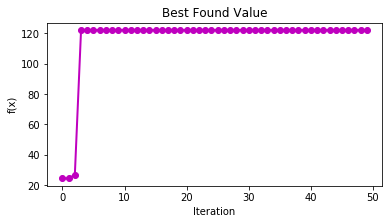

In [8]:
boil.Y_original=evaluating_final_util_MaxEpoch(boil)
viz.show_optimization_progress(boil)

# Plot the training curve of the best found hyperparameter

Best found hyperparameter = [0.84089045 0.0087813  0.00027485]


Text(0.5, 1.0, 'Training curve of best found hyperparameter')

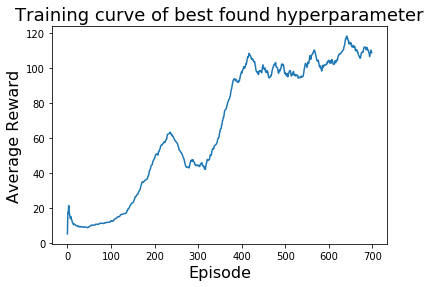

In [9]:
# select the optimal hyperparameter
idxMax=np.argmax(boil.Y_original)
print("Best found hyperparameter =",boil.X_original[idxMax])

# play the best parameter to Max Iteration
T_max=boil.SearchSpace[-1,1]

curve,time=myfunction.func([boil.X_original[idxMax,:-1],T_max])
curve=curve[0]
average100_curve=[np.mean( curve[max(0,n-100):n+1] )     for n in range(len(curve)) ]

# plot the found curve
fig=plt.figure()
plt.plot(average100_curve)
plt.xlabel('Episode',fontsize=16)
plt.ylabel('Average Reward',fontsize=16)
plt.title("Training curve of best found hyperparameter",fontsize=18)


# Play the InvertedPendulum environment using the best found hyperparameter

In [10]:
boil.X_original[idxMax]

array([0.84089045, 0.0087813 , 0.00027485])

# Plot the Conditioning number of the GP covariance matrix

Text(0, 0.5, 'Log of Cond Number of Cov Matrix')

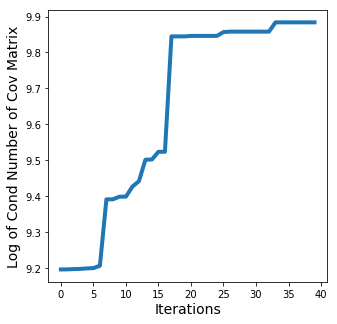

In [11]:
fig=plt.figure(figsize=(5,5))
plt.plot(np.log(boil.condition_number),linewidth=4)
plt.xlabel('Iterations',fontsize=14)
plt.ylabel('Log of Cond Number of Cov Matrix',fontsize=14)

# Plot the estimated preference function

Text(0.5, 1.0, 'Estimated Logistic Curve $m_0$=3.0 $g_0$=2.0')

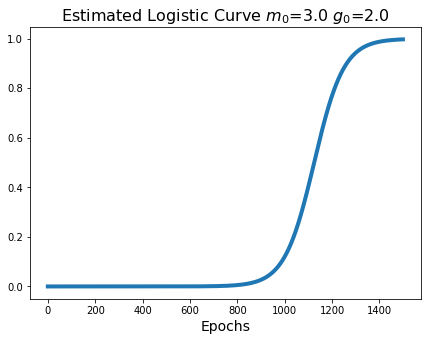

In [12]:
estimated_curve=return_logistic_curve(midpoint=boil.gp.logistic_hyper['midpoint'], 
                                      growth=boil.gp.logistic_hyper['growth'],
                                      MaxEpoch=SearchSpace['maxEpisodes'][1])

fig=plt.figure(figsize=(7,5))
plt.plot(estimated_curve,linewidth=4)
plt.xlabel('Epochs',fontsize=14)
plt.xlabel('Epochs',fontsize=14)

strTitle="Estimated Logistic Curve $m_0$={:.1f} $g_0$={:.1f}".format(boil.gp.logistic_hyper['midpoint'],boil.gp.logistic_hyper['growth'])
plt.title(strTitle,fontsize=16)